In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def rebalancing_criteria(p,q,X,Y,f,g):
    a = np.sqrt(p*q*X*Y)*((1+f)*np.sqrt(p*X/(q*Y))+np.sqrt(q*Y/(p*X))-(2+f))>=g
    b = np.sqrt(p*q*X*Y)*((1+f)*np.sqrt(q*Y/(p*X))+np.sqrt(p*X/(q*Y))-(2+f))>=g
    return (a or b)

In [116]:
#mainnet
g = 10

#gnosis chain
#g = 0.003 

###

#small fee like Uniswap
f = 0.003 

#largest fee on Uniswap
#f = 0.01 

#above market fee
#f = 0.04

###

#Approximation : pX = qY : pool balanced, and X = Y : same value, but doesn't change the result

#small TVL : 100k
X = 5*10**4

#medium TVL : 400k
#X = 2*10**5 

#large TVL : 2M
#X = 10**6 

Y = X

def criteria(p,q):
    return rebalancing_criteria(p,q,X,Y,f,g)
vec_criteria = np.vectorize(criteria)

In [119]:
# Simulate n normal variables
t = 0.0003
def prob(t):
    r = [0.1,0.1]
    cov = np.array([[0.1,0],[0,0.1]]) * t
    n = 10000
    mean = [0,0]
    normal_variables = np.random.multivariate_normal(mean, cov, size=n)

    p = np.exp(r[0]*t)+normal_variables[:,0]
    q = np.exp(r[1]*t)+normal_variables[:,1]
    return np.mean(vec_criteria(p,q))

print(prob(t))

0.0012


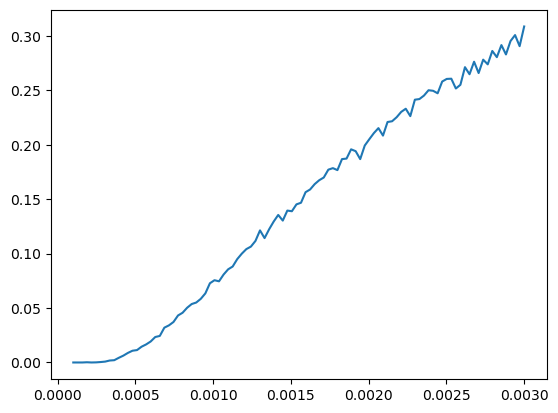

In [120]:
t = np.linspace(0.0001,0.003, 100)
plt.plot(t, [prob(i) for i in t]) 
plt.show()